# CH16 下载数据

In [2]:
from pathlib import Path
import csv


path = Path('ch16/weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


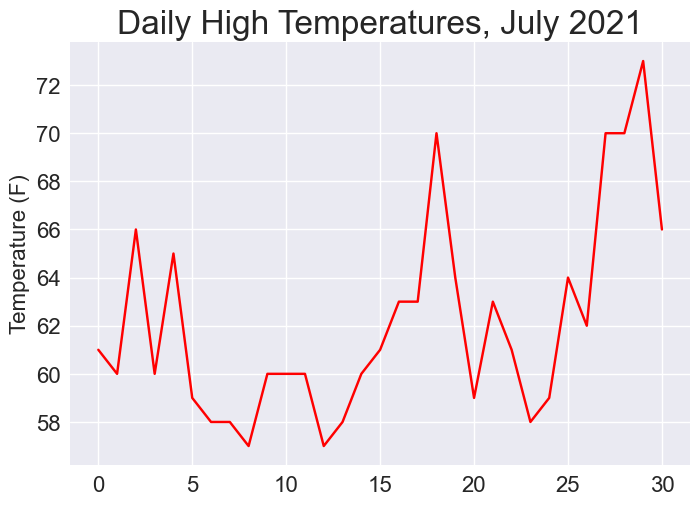

In [4]:
from pathlib import Path
import csv

import matplotlib.pyplot as plt


path = Path('ch16/weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract high temperatures.
highs = []
for row in reader:
    high = int(row[4])
    highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()


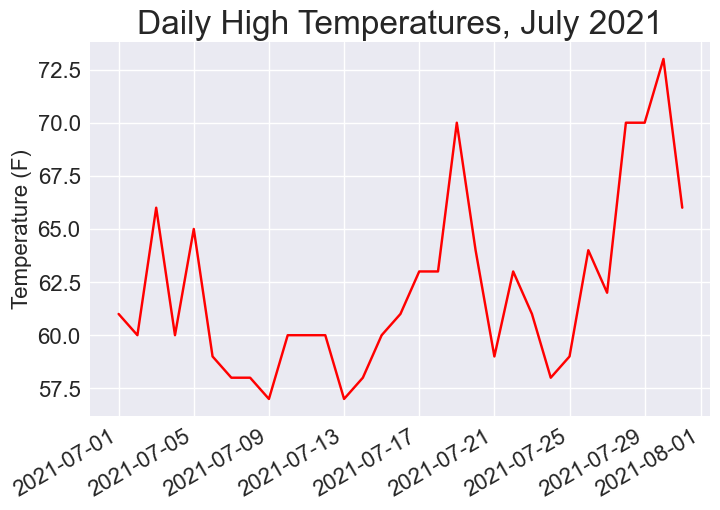

In [5]:
from pathlib import Path
import csv
from datetime import datetime

import matplotlib.pyplot as plt


path = Path('ch16/weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
# 绘制倾斜的⽇期标签，以免它们彼此重叠
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()


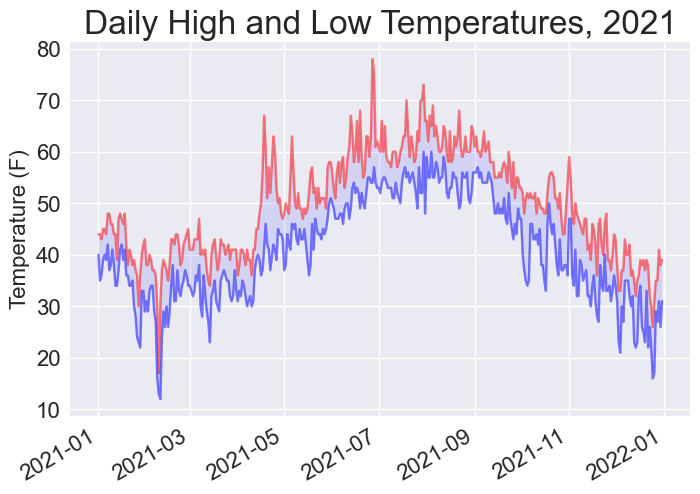

In [6]:
from pathlib import Path
import csv
from datetime import datetime

import matplotlib.pyplot as plt


path = Path('ch16/weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
# alpha 值为 0 表⽰完全透明，为1（默认设置）表⽰完全不透明。
# 通过将 alpha 设置为 0.5，可让红⾊和蓝⾊折线的颜⾊看起来更浅
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()


## 制作地震散点图：GeoJSON格式

In [3]:
from pathlib import Path
import json


# Read data as a string and convert to a Python object.
path = Path('ch16/eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']
# print(len(all_eq_dicts))

mags = []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    mags.append(mag)

print(mags[:10])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]


In [4]:
from pathlib import Path
import json

import plotly.express as px


# Read data as a string and convert to a Python object.
path = Path('ch16/eq_data/eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats = [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, title=title)
fig.show()